In [1]:
import autograd.numpy as np
#import numpy as np 
import pymanopt
from pymanopt.manifolds import Stiefel
from pymanopt import manifolds
from pymanopt.optimizers import ConjugateGradient, SteepestDescent
import matplotlib.pyplot as plt
import time 

np.random.seed(42)

In [2]:
k,n = 3, 10
A_ = np.random.randn(n,n)
# sym 
# A = A_ + A_.T
# positive semi definite
A = A_@A_.T
N = np.diag(np.arange(k, 0, -1))*-1

In [3]:
manifold = Stiefel(n, k)

@pymanopt.function.autograd(manifold)
def cost(U):
    return np.trace(U.T@A@U@N)

problem = pymanopt.Problem(manifold, cost)

In [4]:
optimizers = []
optimizers.append(pymanopt.optimizers.SteepestDescent(verbosity=1, log_verbosity=2))
optimizers.append(pymanopt.optimizers.ConjugateGradient(verbosity=1, log_verbosity=2))

In [5]:
results = []
for optimizer in optimizers:
    res = optimizer.run(problem)
    results.append(res)

Optimizing...
Terminated - min step_size reached after 656 iterations, 0.46 seconds.

Optimizing...
Terminated - min step_size reached after 158 iterations, 0.14 seconds.



### Power Iteration

In [6]:
def F(U):
    return np.trace(U.T@A@U@N)

def gradFnorm(U):
    def sym(X):
        return (X.T + X) / 2
    return np.linalg.norm(2*(A@X@N - X@sym(U.T@A@U@N)))


X = np.random.randn(n,k)
X, _ = np.linalg.qr(X)

class Result:
    def __init__(self):
        self.log = {}

result = Result()
result.log['iterations'] = {}
result.log['optimizer'] = 'PowerIteration'

result.log['iterations']['cost'] = [F(X)]
result.log['iterations']['time'] = [time.time()]
result.log['iterations']['gradient_norm'] = [gradFnorm(X)]
result.log['iterations']['iteration'] = [0]


for i in results[0].log['iterations']['iteration']:
    X = A@X
    X, _ = np.linalg.qr(X)
    
    result.log['iterations']['cost'].append(F(X))
    result.log['iterations']['time'].append(time.time())
    result.log['iterations']['gradient_norm'].append(gradFnorm(X))
    result.log['iterations']['iteration'].append(i+1)

results.append(result)

In [7]:
results[0].log.keys()

dict_keys(['optimizer', 'stopping_criteria', 'optimizer_parameters', 'iterations'])

In [8]:
results[0].log['iterations'].keys()

dict_keys(['time', 'iteration', 'point', 'cost', 'gradient_norm'])

In [9]:
plt.rcParams['text.usetex'] = True

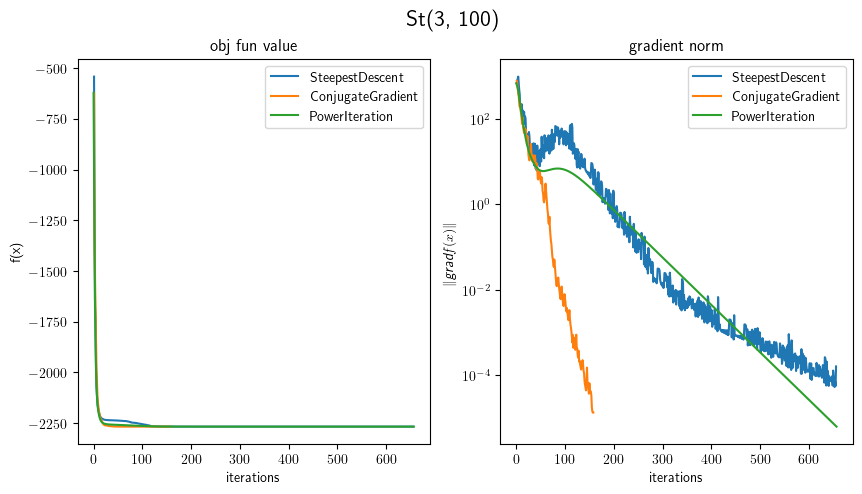

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
f.suptitle(f'St{k,n}', fontsize=16)
ax1.set_title('obj fun value')
ax2.set_title('gradient norm')
for res in results:
    opt_name = res.log['optimizer']
    iters = res.log['iterations']['iteration']
    cost = res.log['iterations']['cost']
    gnorm = res.log['iterations']['gradient_norm']
    ax1.plot(iters, cost, label=opt_name)
    ax2.plot(iters, gnorm, label=opt_name)

    # label
    ax1.set_xlabel('iterations')
    ax2.set_xlabel('iterations')
    ax1.set_ylabel('f(x)')
    ax2.set_ylabel(r'$\|\textit{grad} f(x)\|$')
    
    ax2.set_yscale('log')    
ax1.legend()    
ax2.legend()
plt.savefig(f'fig/St{k,n}_iter.png')

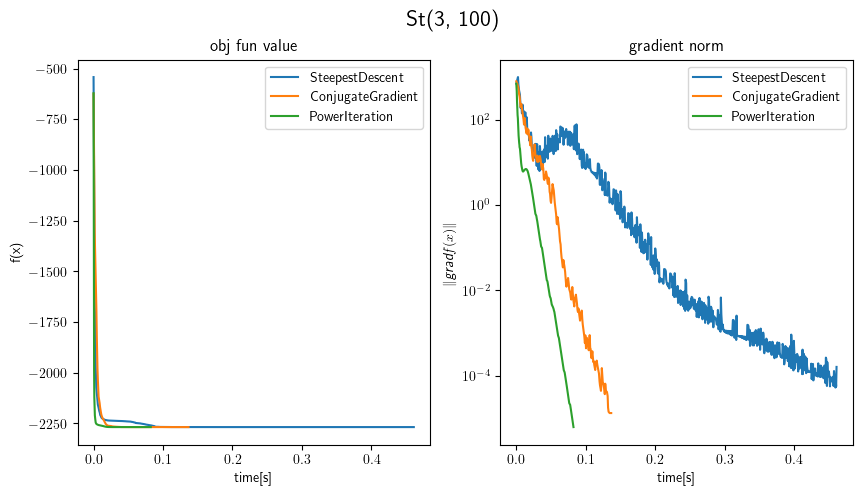

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
f.suptitle(f'St{k,n}', fontsize=16)
ax1.set_title('obj fun value')
ax2.set_title('gradient norm')
for res in results:
    opt_name = res.log['optimizer']
    ts = np.array(res.log['iterations']['time'])
    ts = ts - ts[0]
    cost = res.log['iterations']['cost']
    gnorm = res.log['iterations']['gradient_norm']
    ax1.plot(ts, cost, label=opt_name)
    ax2.plot(ts, gnorm, label=opt_name)
    
    # label
    ax1.set_xlabel('time[s]')
    ax2.set_xlabel('time[s]')
    ax1.set_ylabel('f(x)')
    ax2.set_ylabel(r'$\|\textit{grad} f(x)\|$')
    
    ax2.set_yscale('log')    
ax1.legend()    
ax2.legend()
plt.savefig(f'fig/St{k,n}_time.png')